# Requests

Idea: not tot simulate indicifual equests, but take a short enough period (1 tick), in which the CDN shows a static behaviour, and model the requests together statistically.

In [33]:
from cdnsim.requests import BaseRequests

# 1400 requests on 6 different content
r = BaseRequests(freqs=[300, 200, 100, 400, 200, 200], index={'content': ['c1', 'c2', 'c3', 'c4', 'c5', 'c6']})

## Methods

In [34]:
# Requests is inherited from pd.Series, you can use its methods directly
r.sum()

np.int64(1400)

In [35]:
r[r > 250]

content
c1         300
c4         400
Name: request, dtype: int64

<Axes: xlabel='content', ylabel='probability'>

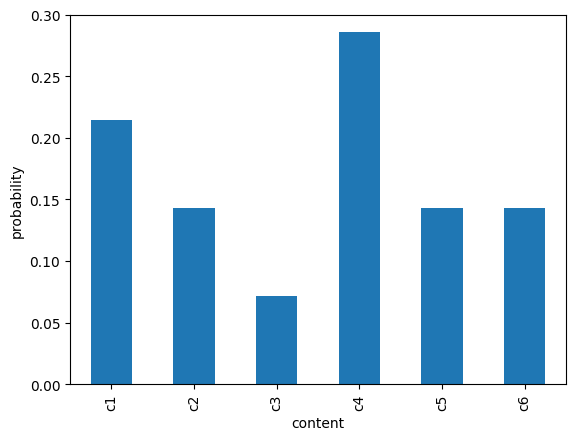

In [36]:
# some extra method is also provided,
# probability mass function
r.pmf.plot.bar(ylabel='probability')

<Axes: xlabel='content', ylabel='probability'>

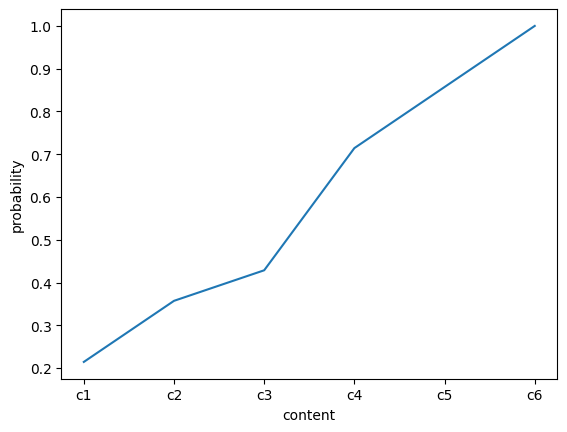

In [37]:
# cumulative density function
r.cdf.plot.line(ylabel='probability')

## Operators

In [38]:
# addition --> join with sum
r1 = BaseRequests(freqs=[10, 20, 30], index={'content': ['c1', 'c2', 'c3']})
r2 = BaseRequests(freqs=[1, 2, 3], index={'content': ['c3', 'c4', 'c5']})
r1 + r2

content
c1         10
c2         20
c3         31
c4          2
c5          3
Name: request, dtype: int64

In [39]:
# floor division --> split into multiple requests
r = BaseRequests(freqs=[10, 6, 2], index={'content': ['c1', 'c2', 'c3']})
r // 3

[content
 c1         3
 c2         2
 c3         0
 Name: request, dtype: int64,
 content
 c1         3
 c2         2
 c3         0
 Name: request, dtype: int64,
 content
 c1         3
 c2         2
 c3         0
 Name: request, dtype: int64]

## Extendind requests

In [49]:
# with time (tick) and size for throughput calculations
from abc import ABC
from typing import List, Hashable, Dict
import pandas as pd


class ThroughputRequests(BaseRequests, ABC):

    def __init__(self,
                 freqs: List[int] = [],
                 index: Dict[str, List[Hashable]] = {'tick': [], 'content': [], 'size': []}):
        if 'tick' not in index.keys() or 'size' not in index.keys():
            raise SyntaxError(f"'tick', 'size' must be part of the level names, got: {index.keys()}")
        super().__init__(freqs=freqs, index=index)

    @property
    def rpt(self) -> pd.Series:
        return r.groupby('tick').sum()

    @property
    def bpt(self) -> pd.Series:
        return r.reset_index('size').prod(axis=1).groupby('tick').sum()

In [72]:
 # 4 contents (c1:10B, c2:20B, c3:30B, c4:4B), requests over 3 ticks: ca. 100,200,300 requests for each content
r = ThroughputRequests(freqs=[130, 90, 90, 100, 250, 230, 220, 240, 290, 330, 320, 330],
                       index={'tick': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                              'content': ['c1', 'c2', 'c3', 'c4', 'c1', 'c2', 'c3', 'c4', 'c1', 'c2', 'c3', 'c4'],
                              'size': [10, 20, 30, 4, 10, 20, 30, 4, 10, 20, 30, 4]})
r

tick  content  size
0     c1       10      130
      c2       20       90
      c3       30       90
      c4       4       100
1     c1       10      250
      c2       20      230
      c3       30      220
      c4       4       240
2     c1       10      290
      c2       20      330
      c3       30      320
      c4       4       330
Name: request, dtype: int64

<Axes: xlabel='tick', ylabel='rpt'>

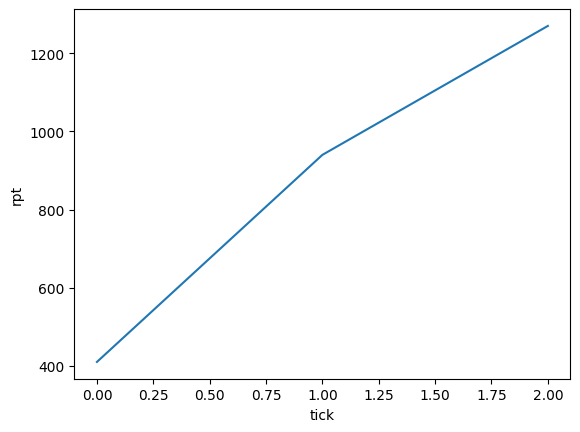

In [70]:
# requests pro tick (rpt)
r.rpt.plot.line(ylabel='rpt')

<Axes: xlabel='tick', ylabel='bpt'>

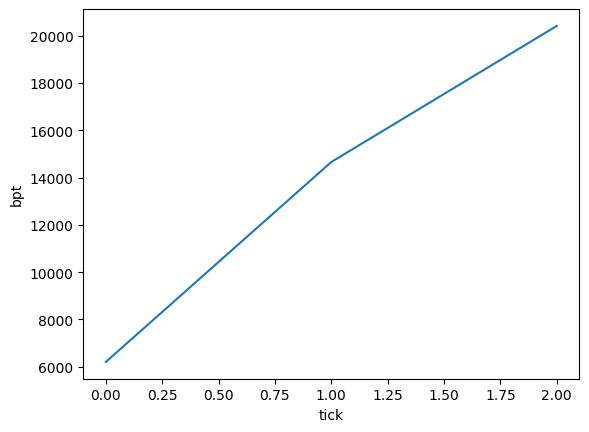

In [71]:
# bytes pro tick (bpt)
r.bpt.plot.line(ylabel='bpt')